In [1]:
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_gate_map, plot_histogram
from qiskit import pulse
from qiskit.circuit import QuantumCircuit, Gate, Parameter
from qiskit.pulse.library import Gaussian
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
import numpy as np

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_brisbane')
#we used ibmq_mumbai for the experiment

C:\Users\Milou\AppData\Local\Temp\ipykernel_17020\1208288620.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [2]:
#Setting up relevant parameters
backend_config = backend.configuration()
dt = backend_config.dt
#print(f"Sampling time: {dt*1e9} ns")    # The configuration returns dt in seconds, so multiply by
                                        # 1e9 to get nanoseconds
backend.configuration().timing_constraints
acquire_alignment = backend.configuration().timing_constraints['acquire_alignment']
granularity = backend.configuration().timing_constraints['granularity']
pulse_alignment = backend.configuration().timing_constraints['pulse_alignment']

lcm = np.lcm(acquire_alignment, pulse_alignment)
#print(f"Least common multiple of acquire_alignment and pulse_alignment: {lcm}")

backend_defaults = backend.defaults()

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc.)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# scale factor to remove factors of 10 from the data
scale_factor = 1e-7

def get_closest_multiple_of(value, base_number):
    return int(value + base_number/2) - (int(value + base_number/2) % base_number)

# samples need to be multiples of 16
def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

# Convert seconds to dt
def get_dt_from(sec):
    return get_closest_multiple_of(sec/dt, lcm)

#to find the value from our data acquisition
def finding_value(counts):
    if '1' in counts:
        return (counts['1'])/1024
    else:
        return 0

In [3]:
#to find the value from our data acquisition
def finding_value(counts):
    if '1' in counts:
        return (counts['1'])/1024
    else:
        return 0

In [4]:
drive_duration_sec = 30*ns
drive_sigma_sec = drive_duration_sec/8

hamil=backend_config.hamiltonian['vars']
g_coupling = hamil['omegad0']

def amp(theta,drive_sigma_sec,g_coupling):
    result = theta/(np.sqrt(2*np.pi)*g_coupling*drive_sigma_sec)
    return result 

In [5]:
theta = np.linspace(0, np.pi, 16)
y_values = [] 
job_ID=[]

#for i in range(len(theta)):
##    theta_round = theta[i]
#    drive_amp = amp(theta_round,drive_sigma_sec,g_coupling)

#    with pulse.build(backend=backend, default_alignment='sequential', name='QB Gate') as QB_Gate:
#        drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
#        drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
#        drive_chan = pulse.drive_channel(qubit)
    
 #       drive_amp = amp(theta_round,drive_sigma_sec,g_coupling)
        #pulse.set_frequency(freq, drive_chan)
        # Drive pulse samples
 #       pulse.play(pulse.Gaussian(duration=drive_duration,
 #                                 sigma=drive_sigma,
 #                                 amp=drive_amp,
 #                                 angle = theta_round,
 #                                 name='Quantum Battery Gate'), drive_chan)

#    circ = QuantumCircuit(1)
#    custom_gate = Gate('my_custom_gate',1,[])

#    circ.append(custom_gate,[0])
#    circ.measure_all()

#    circ.add_calibration(custom_gate, [0], QB_Gate) 

#    circ_transpile = transpile(circ, backend)
#    circ_sched = schedule(circ_transpile, backend)

#    job = backend.run(circ_sched, shots=1024)    
#    ID=job.job_id()
#    job_ID.append(ID)

## Using the experimental data

In [6]:
#to find the value from our data acquisition
def finding_value(counts):
    total=counts['1']+counts['0']
    return (counts['1'])/total

In [7]:
#when using new experimental data
values=[]
for i in job_ID:
    counts=provider.backend.retrieve_job(i).result().get_counts()
    values.append(finding_value(counts))

In [13]:
#Our experimental data
values1=[0.0380859375, 0.0361328125, 0.0576171875, 0.1171875, 0.181640625, 0.2646484375, 0.3291015625, 0.4365234375, 0.5205078125, 0.6572265625, 0.697265625, 0.8095703125, 0.8818359375, 0.896484375, 0.9501953125, 0.9677734375]
values2=[0.0234375, 0.0400390625, 0.0625, 0.12109375, 0.17578125, 0.240234375, 0.3251953125, 0.4521484375, 0.51953125, 0.607421875, 0.73046875, 0.7822265625, 0.8505859375, 0.908203125, 0.951171875, 0.978515625]
values3=[0.0361328125, 0.033203125, 0.0625, 0.1220703125, 0.15625, 0.220703125, 0.3046875, 0.3837890625, 0.517578125, 0.625, 0.693359375, 0.775390625, 0.87109375, 0.9111328125, 0.9482421875, 0.982421875]
values4=[0.0380859375, 0.0517578125, 0.068359375, 0.123046875, 0.1630859375, 0.2529296875, 0.3134765625, 0.4326171875, 0.552734375, 0.6162109375, 0.6904296875, 0.798828125, 0.8828125, 0.921875, 0.943359375, 0.98046875]
values5=[0.033203125, 0.0400390625, 0.064453125, 0.119140625, 0.1552734375, 0.2470703125, 0.33984375, 0.421875, 0.5419921875, 0.5458984375, 0.634765625, 0.7822265625, 0.7763671875, 0.8994140625, 0.955078125, 0.9697265625]
values6=[0.02734375, 0.0419921875, 0.0654296875, 0.11328125, 0.1796875, 0.2685546875, 0.330078125, 0.4423828125, 0.515625, 0.6015625, 0.7109375, 0.7822265625, 0.8740234375, 0.9150390625, 0.955078125, 0.9755859375]
values7=[0.0341796875, 0.046875, 0.0810546875, 0.107421875, 0.16796875, 0.2587890625, 0.3330078125, 0.4716796875, 0.5185546875, 0.6083984375, 0.712890625, 0.7861328125, 0.8564453125, 0.9287109375, 0.953125, 0.9853515625]
values8=[0.0380859375, 0.044921875, 0.0712890625, 0.1142578125, 0.1669921875, 0.2509765625, 0.3466796875, 0.4111328125, 0.5283203125, 0.619140625, 0.7158203125, 0.78515625, 0.861328125, 0.9091796875, 0.962890625, 0.98046875]
values9=[0.0400390625, 0.037109375, 0.0732421875, 0.103515625, 0.1689453125, 0.2431640625, 0.3564453125, 0.44140625, 0.5068359375, 0.625, 0.7373046875, 0.794921875, 0.8623046875, 0.9228515625, 0.95703125, 0.9765625]
values10=[0.033203125, 0.0478515625, 0.072265625, 0.1064453125, 0.1884765625, 0.2734375, 0.33984375, 0.4521484375, 0.5185546875, 0.59765625, 0.708984375, 0.7890625, 0.84375, 0.921875, 0.9541015625, 0.974609375]


In [21]:
data=[]
data.append(values1)
data.append(values2)
data.append(values3)
data.append(values4)
data.append(values5)
data.append(values6)
data.append(values7)
data.append(values8)
data.append(values9)
data.append(values10)

In [22]:
print(data)

[[0.0380859375, 0.0361328125, 0.0576171875, 0.1171875, 0.181640625, 0.2646484375, 0.3291015625, 0.4365234375, 0.5205078125, 0.6572265625, 0.697265625, 0.8095703125, 0.8818359375, 0.896484375, 0.9501953125, 0.9677734375], [0.0234375, 0.0400390625, 0.0625, 0.12109375, 0.17578125, 0.240234375, 0.3251953125, 0.4521484375, 0.51953125, 0.607421875, 0.73046875, 0.7822265625, 0.8505859375, 0.908203125, 0.951171875, 0.978515625], [0.0361328125, 0.033203125, 0.0625, 0.1220703125, 0.15625, 0.220703125, 0.3046875, 0.3837890625, 0.517578125, 0.625, 0.693359375, 0.775390625, 0.87109375, 0.9111328125, 0.9482421875, 0.982421875], [0.0380859375, 0.0517578125, 0.068359375, 0.123046875, 0.1630859375, 0.2529296875, 0.3134765625, 0.4326171875, 0.552734375, 0.6162109375, 0.6904296875, 0.798828125, 0.8828125, 0.921875, 0.943359375, 0.98046875], [0.033203125, 0.0400390625, 0.064453125, 0.119140625, 0.1552734375, 0.2470703125, 0.33984375, 0.421875, 0.5419921875, 0.5458984375, 0.634765625, 0.7822265625, 0.77636

# Plot the data

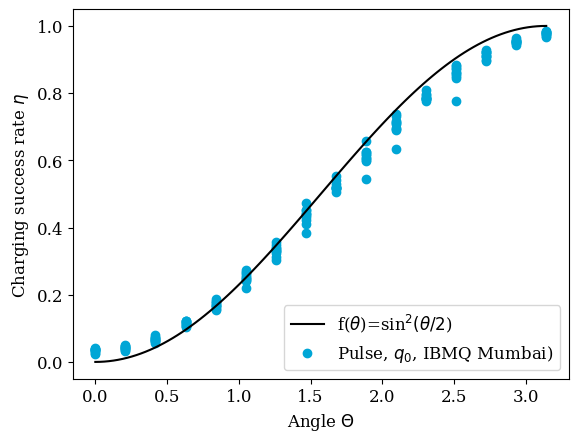

In [16]:
font = {'family':'serif','size':12}

# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in data:
    plt.scatter(theta,i,color=tud_color)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Pulse, $q_0$, IBMQ Mumbai)"], prop=font, loc="lower right")
plt.show()

## Data Analysis

In [23]:
dataF=np.array(data)
data=dataF.transpose()

In [24]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.0341796875, 0.0419921875, 0.06787109375, 0.11474609375, 0.17041015625, 0.25205078125, 0.3318359375, 0.4345703125, 0.5240234375, 0.6103515625, 0.70322265625, 0.78857421875, 0.8560546875, 0.9134765625, 0.95302734375, 0.9771484375]


In [25]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.004979511243742954, 0.005524271728019903, 0.006437169335030077, 0.006626967803642011, 0.010346494189656783, 0.014703347604750857, 0.014437280166075256, 0.023237263133794796, 0.012905412919282648, 0.026726430045710955, 0.02689166594667752, 0.009480706952611133, 0.029202974518071356, 0.010008693730717935, 0.005007204587224324, 0.005207926416395853]


In [26]:
mean_std_dev=np.mean(std_dev)
print(mean_std_dev)

0.013232707520087771


In [27]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.0015746597164645604, 0.0017469281074217107, 0.0020356116782886554, 0.002095631224011224, 0.0032718487437013583, 0.004649606766019388, 0.004565468854277181, 0.007348267809145354, 0.00408104989698959, 0.00845163926696047, 0.008503891446788907, 0.0029980627798845217, 0.009234791392896348, 0.0031650268592116637, 0.001583417120607211, 0.0016468909362369367]


In [28]:
mean_std_err=np.mean(std_err)
print(mean_std_err)

0.004184549537431567


In [29]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.0400390625, 0.0517578125, 0.0810546875, 0.123046875, 0.1884765625, 0.2734375, 0.3564453125, 0.4716796875, 0.552734375, 0.6572265625, 0.7373046875, 0.8095703125, 0.8828125, 0.9287109375, 0.962890625, 0.9853515625]
Minimum values: [0.0234375, 0.033203125, 0.0576171875, 0.103515625, 0.1552734375, 0.220703125, 0.3046875, 0.3837890625, 0.5068359375, 0.5458984375, 0.634765625, 0.775390625, 0.7763671875, 0.896484375, 0.943359375, 0.9677734375]


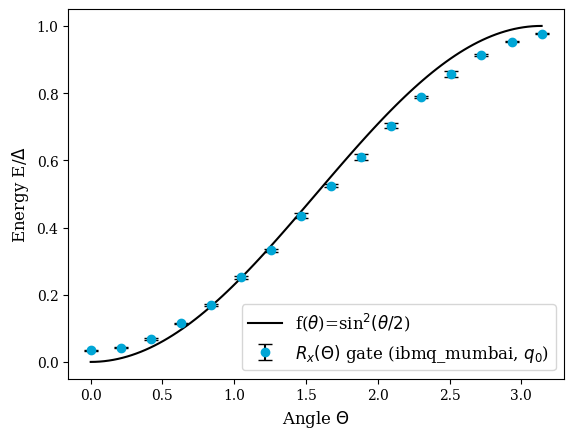

In [30]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$R_x(\Theta)$ gate (ibmq_mumbai, $q_0$)"], prop=font, loc="lower right")
plt.show()

In [31]:
max(mean_values)

0.9771484375

## Fit function 

In [32]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [33]:
from scipy.optimize import curve_fit

guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

print(fit_a)
print(fit_b)

0.9636424444326218
-0.13659565685821357


In [34]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96364 with standard error of 0.00202.
The value of phi is -0.13660 with standard error of 0.01218.


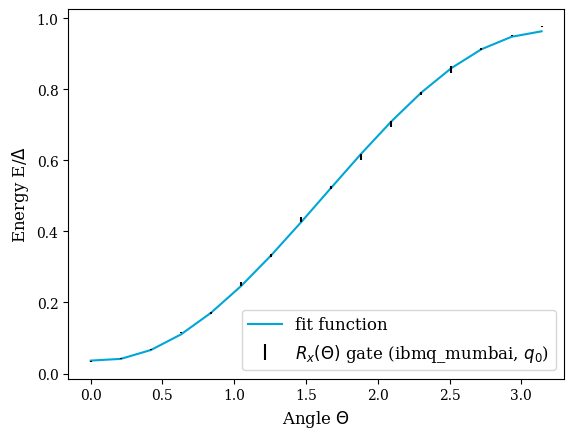

In [35]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "$R_x(\Theta)$ gate (ibmq_mumbai, $q_0$)"], prop=font, loc="lower right")